<a href="https://colab.research.google.com/github/BrMrtn/GoogleColab/blob/main/K%C3%A9pfeldolgoz%C3%A1s/khf6_L%C5%91lap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/lolap1_1.bmp
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/lolap1_2.bmp
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/lolap2_1.bmp
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/lolap2_2.bmp

--2024-12-05 22:50:33--  https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/lolap1_1.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5070054 (4.8M) [image/bmp]
Saving to: ‘lolap1_1.bmp.30’

lolap1_1.bmp.30     100%[===================>]   4.83M  --.-KB/s    in 0.1s    

2024-12-05 22:50:33 (49.6 MB/s) - ‘lolap1_1.bmp.30’ saved [5070054/5070054]

--2024-12-05 22:50:33--  https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/lolap1_2.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5070054 (4.8M

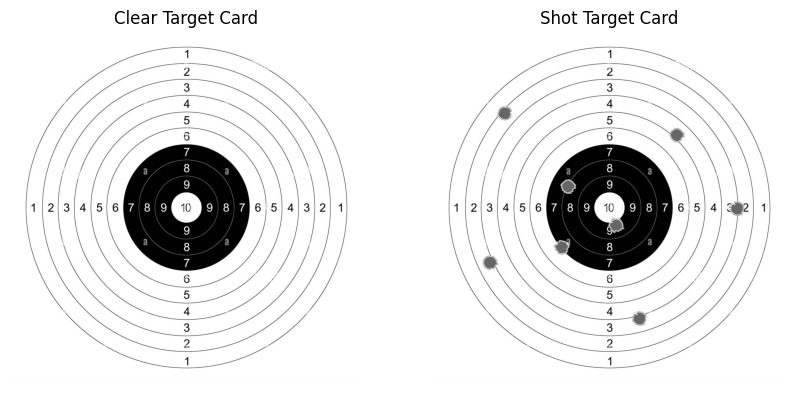

In [3]:
target_card = cv2.imread('lolap1_1.bmp')
target_card_shot = cv2.imread('lolap1_2.bmp')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(target_card, cv2.COLOR_BGR2RGB))
axs[0].set_title('Clear Target Card')
axs[1].imshow(cv2.cvtColor(target_card_shot, cv2.COLOR_BGR2RGB))
axs[1].set_title('Shot Target Card')
axs[0].axis('off'); axs[1].axis('off');

In [17]:
# Hough-transzformáció használatához szürkeárnyalator kép kell
target_card = cv2.cvtColor(target_card, cv2.COLOR_BGR2GRAY)
target_card_shot = cv2.cvtColor(target_card_shot, cv2.COLOR_BGR2GRAY)

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


Alapkörök megtalálása a lövések nélküli képen

In [5]:
base_circles = []

width = 56 # A gyűrű egyes csíkjainak szélessége (a 10-es kör sugara).
# közép: 650, 650

# 10-es kör megtalálása
found_circles = cv2.HoughCircles(target_card, cv2.HOUGH_GRADIENT, 1, 1000, param1=200, param2=10, minRadius=56-10, maxRadius=56+10) # image, method, 1 (accumulator res = img res), minDist,
found_circles = np.uint16(np.around(found_circles)) # típuskonverzió (ne legyen pl. 2.4-edik pixel)
circle10 = found_circles[0, 0]
base_circles.append(circle10)

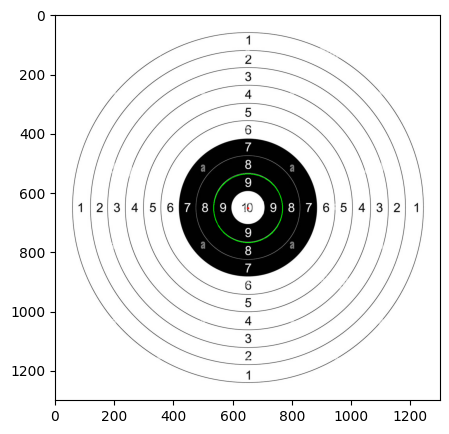

In [6]:
found_circles = cv2.HoughCircles(target_card, cv2.HOUGH_GRADIENT, 1, 1000, param1=200, param2=10, minRadius=2*56-10, maxRadius=2*56+10) # image, method, 1 (accumulator res = img res), minDist,
found_circles = np.uint16(np.around(found_circles)) # típuskonverzió (ne legyen pl. 2.4-edik pixel)

target_card1 = cv2.cvtColor(target_card, cv2.COLOR_GRAY2BGR)
for i in found_circles[0, :]:
  cv2.circle(target_card1, (i[0], i[1]), i[2], (0, 255, 0), 2)
  cv2.circle(target_card1, (i[0], i[1]), 2, (0, 0, 255), 3)

# show target card
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.imshow(cv2.cvtColor(target_card1, cv2.COLOR_BGR2RGB))

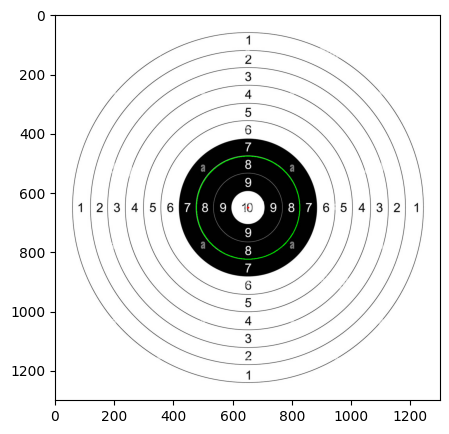

In [7]:
found_circles = cv2.HoughCircles(target_card, cv2.HOUGH_GRADIENT, 1, 1000, param1=200, param2=10, minRadius=3*56-10, maxRadius=3*56+10) # image, method, 1 (accumulator res = img res), minDist,
found_circles = np.uint16(np.around(found_circles)) # típuskonverzió (ne legyen pl. 2.4-edik pixel)

target_card2 = cv2.cvtColor(target_card, cv2.COLOR_GRAY2BGR)
for i in found_circles[0, :]:
  cv2.circle(target_card2, (i[0], i[1]), i[2], (0, 255, 0), 2)
  cv2.circle(target_card2, (i[0], i[1]), 2, (0, 0, 255), 3)

# show target card
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.imshow(cv2.cvtColor(target_card2, cv2.COLOR_BGR2RGB))

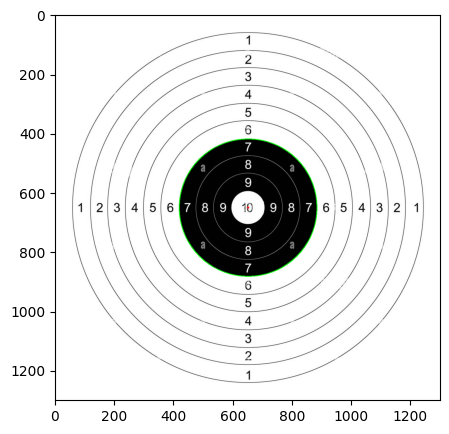

In [8]:
found_circles = cv2.HoughCircles(target_card, cv2.HOUGH_GRADIENT, 1, 1000, param1=200, param2=10, minRadius=4*56-10, maxRadius=4*56+10) # image, method, 1 (accumulator res = img res), minDist,
found_circles = np.uint16(np.around(found_circles)) # típuskonverzió (ne legyen pl. 2.4-edik pixel)

target_card3 = cv2.cvtColor(target_card, cv2.COLOR_GRAY2BGR)
for i in found_circles[0, :]:
  cv2.circle(target_card3, (i[0], i[1]), i[2], (0, 255, 0), 2)
  cv2.circle(target_card3, (i[0], i[1]), 2, (0, 0, 255), 3)

# show target card
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.imshow(cv2.cvtColor(target_card3, cv2.COLOR_BGR2RGB))

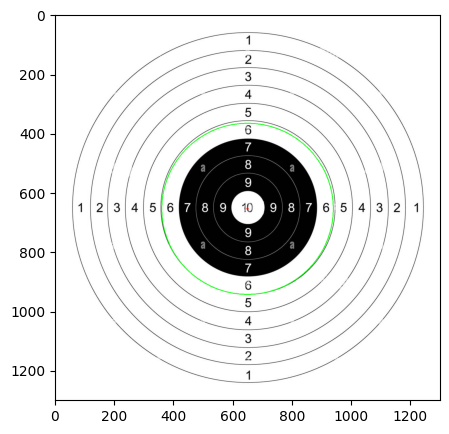

In [9]:
found_circles = cv2.HoughCircles(target_card, cv2.HOUGH_GRADIENT, 1, 1000, param1=200, param2=10, minRadius=5*56-10, maxRadius=5*56+10) # image, method, 1 (accumulator res = img res), minDist,
found_circles = np.uint16(np.around(found_circles)) # típuskonverzió (ne legyen pl. 2.4-edik pixel)

target_card4 = cv2.cvtColor(target_card, cv2.COLOR_GRAY2BGR)
for i in found_circles[0, :]:
  cv2.circle(target_card4, (i[0], i[1]), i[2], (0, 255, 0), 2)
  cv2.circle(target_card4, (i[0], i[1]), 2, (0, 0, 255), 3)

# show target card
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.imshow(cv2.cvtColor(target_card4, cv2.COLOR_BGR2RGB))

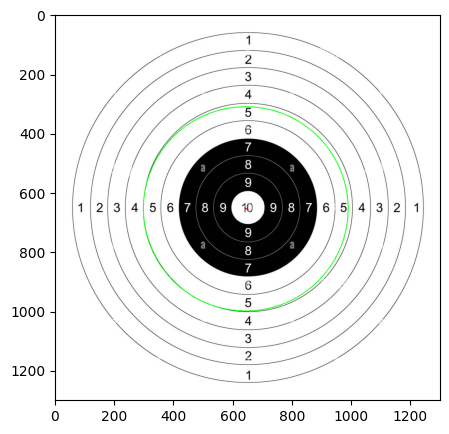

In [10]:
found_circles = cv2.HoughCircles(target_card, cv2.HOUGH_GRADIENT, 1, 1000, param1=200, param2=10, minRadius=6*56-10, maxRadius=6*56+10) # image, method, 1 (accumulator res = img res), minDist,
found_circles = np.uint16(np.around(found_circles)) # típuskonverzió (ne legyen pl. 2.4-edik pixel)

target_card5 = cv2.cvtColor(target_card, cv2.COLOR_GRAY2BGR)
for i in found_circles[0, :]:
  cv2.circle(target_card5, (i[0], i[1]), i[2], (0, 255, 0), 2)
  cv2.circle(target_card5, (i[0], i[1]), 2, (0, 0, 255), 3)

# show target card
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.imshow(cv2.cvtColor(target_card5, cv2.COLOR_BGR2RGB))

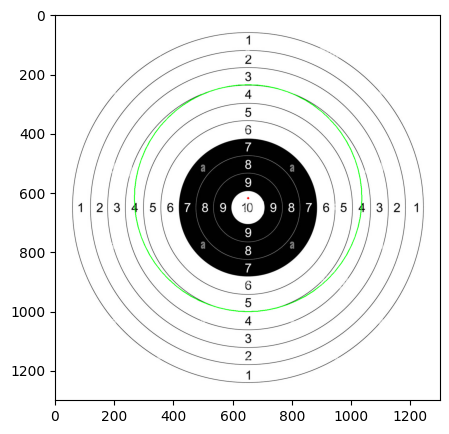

In [11]:
found_circles = cv2.HoughCircles(target_card, cv2.HOUGH_GRADIENT, 1, 1000, param1=200, param2=10, minRadius=7*56-10, maxRadius=7*56+10) # image, method, 1 (accumulator res = img res), minDist,
found_circles = np.uint16(np.around(found_circles)) # típuskonverzió (ne legyen pl. 2.4-edik pixel)

target_card6 = cv2.cvtColor(target_card, cv2.COLOR_GRAY2BGR)
for i in found_circles[0, :]:
  cv2.circle(target_card6, (i[0], i[1]), i[2], (0, 255, 0), 2)
  cv2.circle(target_card6, (i[0], i[1]), 2, (0, 0, 255), 3)

# show target card
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.imshow(cv2.cvtColor(target_card6, cv2.COLOR_BGR2RGB))

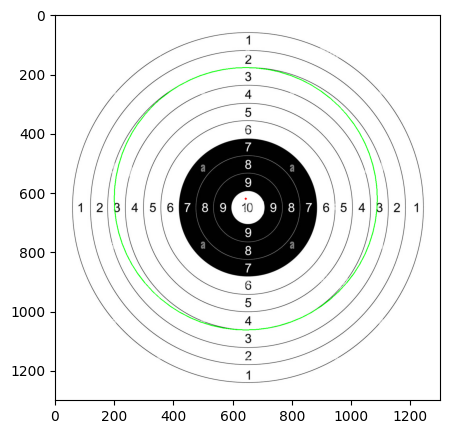

In [12]:
found_circles = cv2.HoughCircles(target_card, cv2.HOUGH_GRADIENT, 1, 1000, param1=200, param2=10, minRadius=8*56-10, maxRadius=8*56+10) # image, method, 1 (accumulator res = img res), minDist,
found_circles = np.uint16(np.around(found_circles)) # típuskonverzió (ne legyen pl. 2.4-edik pixel)

target_card7 = cv2.cvtColor(target_card, cv2.COLOR_GRAY2BGR)
for i in found_circles[0, :]:
  cv2.circle(target_card7, (i[0], i[1]), i[2], (0, 255, 0), 2)
  cv2.circle(target_card7, (i[0], i[1]), 2, (0, 0, 255), 3)

# show target card
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.imshow(cv2.cvtColor(target_card7, cv2.COLOR_BGR2RGB))

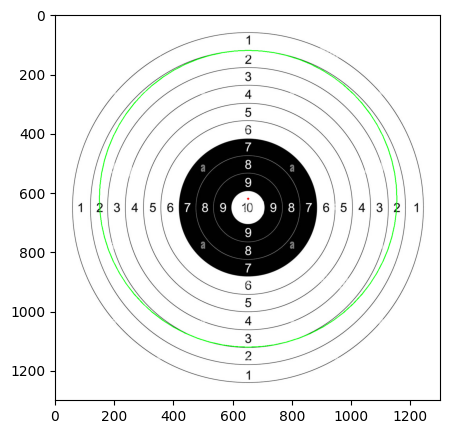

In [13]:
found_circles = cv2.HoughCircles(target_card, cv2.HOUGH_GRADIENT, 1, 1000, param1=200, param2=10, minRadius=9*56-10, maxRadius=9*56+10) # image, method, 1 (accumulator res = img res), minDist,
found_circles = np.uint16(np.around(found_circles)) # típuskonverzió (ne legyen pl. 2.4-edik pixel)

target_card8 = cv2.cvtColor(target_card, cv2.COLOR_GRAY2BGR)
for i in found_circles[0, :]:
  cv2.circle(target_card8, (i[0], i[1]), i[2], (0, 255, 0), 2)
  cv2.circle(target_card8, (i[0], i[1]), 2, (0, 0, 255), 3)

# show target card
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.imshow(cv2.cvtColor(target_card8, cv2.COLOR_BGR2RGB))

In [18]:
found_circles = cv2.HoughCircles(target_card, cv2.HOUGH_GRADIENT, 1, 1000, param1=200, param2=100, minRadius=10*56-10, maxRadius=10*56+10) # image, method, 1 (accumulator res = img res), minDist,
found_circles = np.uint16(np.around(found_circles)) # típuskonverzió (ne legyen pl. 2.4-edik pixel)

target_card9 = cv2.cvtColor(target_card, cv2.COLOR_GRAY2BGR)
for i in found_circles[0, :]:
  cv2.circle(target_card9, (i[0], i[1]), i[2], (0, 255, 0), 2)
  cv2.circle(target_card9, (i[0], i[1]), 2, (0, 0, 255), 3)

# show target card
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.imshow(cv2.cvtColor(target_card9, cv2.COLOR_BGR2RGB))

TypeError: loop of ufunc does not support argument 0 of type NoneType which has no callable rint method